In [109]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from scipy.stats import norm, skew, kurtosis
import matplotlib.mlab as mlab
import pickle

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.hh_decomp import window_tukey, window_field
from scripts.common import *

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x384x128/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0040_fine/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)
kx = [2.0*np.pi/float(Lx)*w for w in range(0,int(Nx/2))]; kx = np.array(kx)
kz = [2.0*np.pi/float(Lz)*w for w in range(0,int(Nz/2))]; kz = np.array(kz)

flist = glob.glob(directory+"momdecomp*pkl")
flist.sort()
print([f.split('/')[-1] for f in flist])

# tlist,dlist,rates = growth_rates(directory+'shearlayer_')

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
['momdecomp_7946.pkl', 'momdecomp_7947.pkl', 'momdecomp_7948.pkl', 'momdecomp_7949.pkl', 'momdecomp_7951.pkl', 'momdecomp_7952.pkl', 'momdecomp_7953.pkl', 'momdecomp_7954.pkl', 'momdecomp_7956.pkl', 'momdecomp_7957.pkl', 'momdecomp_7958.pkl', 'momdecomp_7959.pkl', 'momdecomp_7961.pkl', 'momdecomp_7962.pkl', 'momdecomp_7963.pkl', 'momdecomp_7964.pkl', 'momdecomp_7965.pkl']


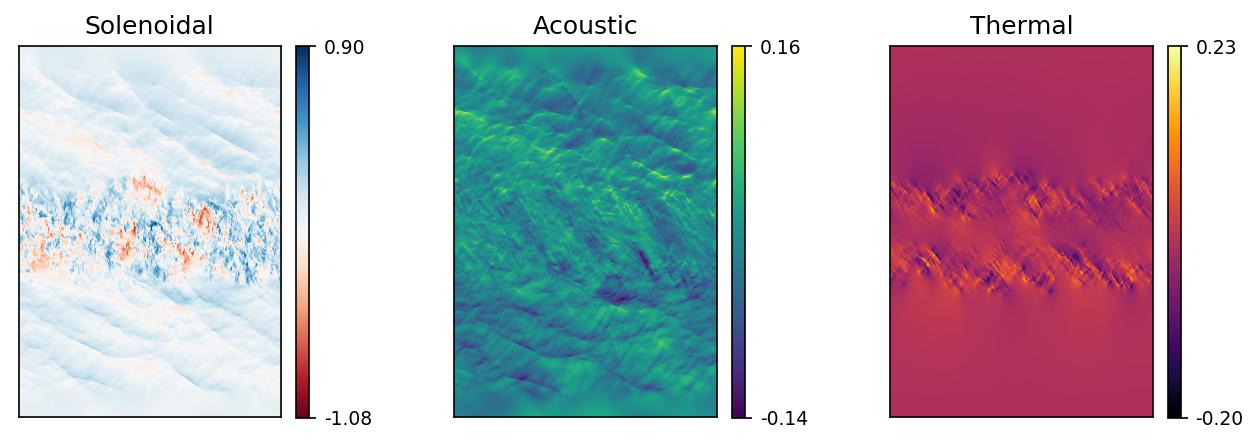

In [128]:

def plot_planes(fname,key='zplanes',comp='y',yslice=0):
    pkl_file = open(fname, 'rb')
    planes = pickle.load(pkl_file)
    pkl_file.close()

    fig,ax = plt.subplots(1,3,figsize=(10,4),dpi=150)
    titles = ['Solenoidal','Acoustic','Thermal']
    maps = ['RdBu','viridis','inferno']
    for i,name in enumerate(['b','acoustic','thermal']):
        dat = planes[key][name][comp]
        if key =='yplanes': dat = dat[:,:,yslice]
        im = ax[i].imshow(np.transpose(dat),cmap=maps[i])
        ax[i].set_title(titles[i])
        
        # cbar
        divider1 = make_axes_locatable(ax[i])
        cax = divider1.append_axes('right', size='5%', pad=0.1)
        maxval = np.amax(dat)
        minval = np.amin(dat)
        cbar = plt.colorbar(im, cax,ticks=[minval,maxval])
        cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
        cbar.ax.tick_params(labelsize=0.75*fs)
        
    plt.subplots_adjust(wspace=0.5)
    for a in ax:
        a.set_xticks([])
        a.set_yticks([])

plot_planes(flist[0],key='zplanes',comp='y')
# plot_planes(flist[0],key='yplanes',comp='y',yslice=2)